Nuestro primer ejercicio con Keras es construir un clasificador multiclase basado en una Red Neuronal Artificial (ANN, o simplemente NN).

El objetivo es clasificar las imágenes de dígitos (28x28 pixeles) de la popular base de datos MNIST

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import keras
print('backend :', keras.backend.backend())
print('keras version :', keras.__version__) #revisamos versión de keras usada

backend : tensorflow
keras version : 2.2.4


In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 894247018828817576
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16951702055600413993
physical_device_desc: "device: XLA_CPU device"
]


In [19]:
# cargar la interfaz a la base de datos que vienen con keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('Dimensiones del conjunto de entrenamiento: ', train_images.shape)
print('Dimensiones del conjunto de evaluación: ', train_images.shape)

num_data, nrows, ncols = train_images.shape

Dimensiones del conjunto de entrenamiento:  (60000, 28, 28)
Dimensiones del conjunto de evaluación:  (60000, 28, 28)


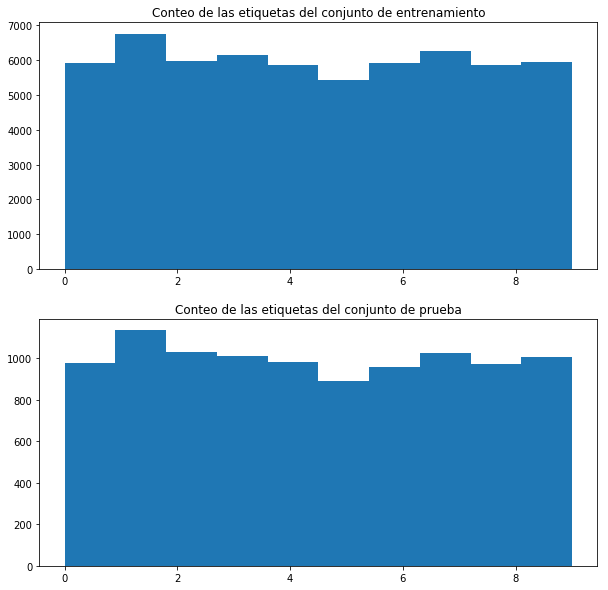

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.hist(train_labels[:], bins=10)
plt. title('Conteo de las etiquetas del conjunto de entrenamiento')
plt.subplot(212)
plt.hist(test_labels[:], bins=10)
plt. title('Conteo de las etiquetas del conjunto de prueba')
plt.show()

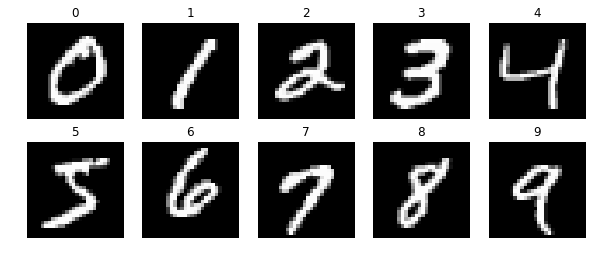

In [21]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(train_labels).index(i)
    plt.imshow(train_images[idx], 'gray')
    plt.title(train_labels[idx])
    plt.axis('off')
    
plt.show()

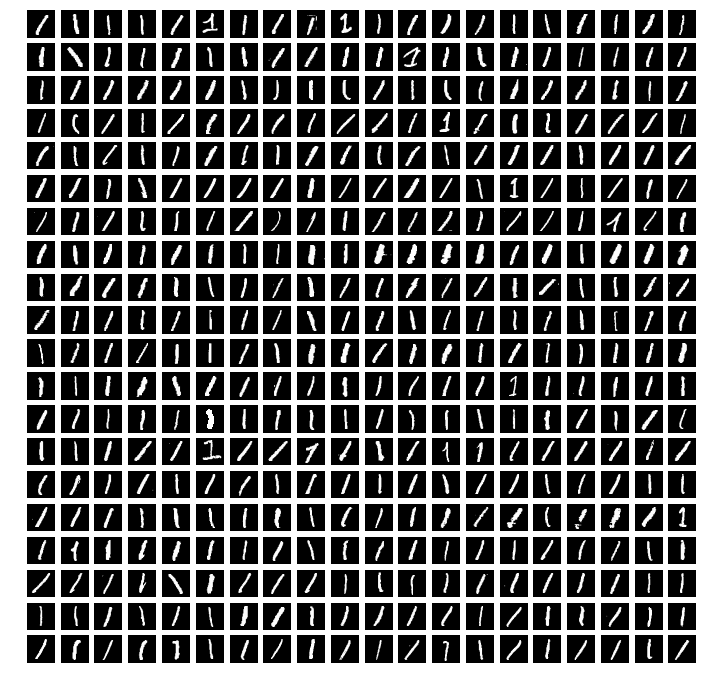

In [22]:
nrowsIm = 20
ncolsIm = 20
numIm = nrowsIm*ncolsIm

digit=1
Indexes = np.where(train_labels==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i,idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(train_images[idx], 'gray')
    plt.axis('off')
    
plt.show()

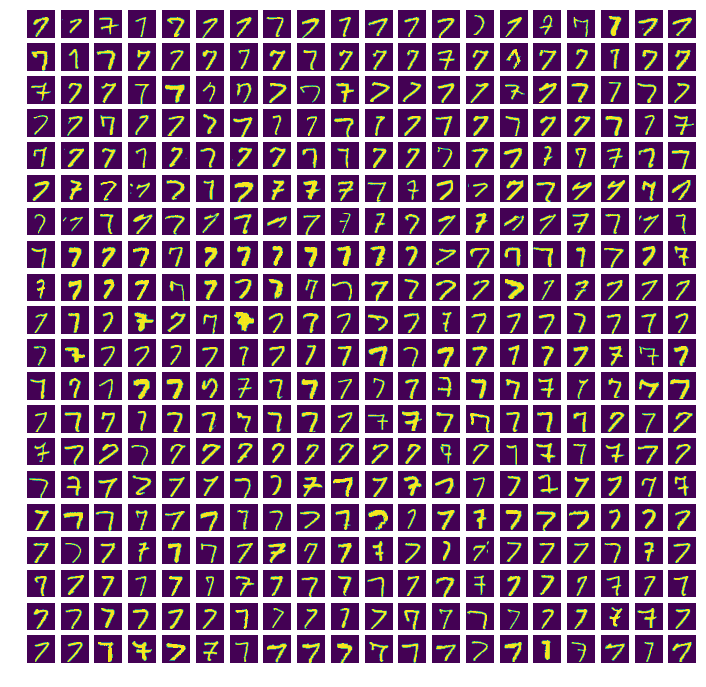

In [23]:
digit=7
Indexes = np.where(train_labels==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i,idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(train_images[idx])
    plt.axis('off')
    
plt.show()

In [0]:
#procesamiento
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images  = test_images.reshape((10000, 28 * 28))
test_images  = test_images.astype('float32') / 255

numIm, szIm  = train_images.shape


In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [0]:
#hacemos la red
from keras import models
from keras import layers

nn = models.Sequential()            # Modelo secuencial 

In [0]:
# añadir al modelo nn la primera capa oculta
nn.add(layers.Dense(units=512,                    # numero de neuronas en la capa 
                    activation='relu',            # funcion de activacion = lineal rectificada
                    input_shape=(szIm,)))         # forma de la entrada: (szIm, ) la otra 
                                                  # dimension es el tamano de lote (szBatch), 
                                                  # que se define en 'fit'
# añadir otra capa
# .....         dejado de ejercicio probar incluir esta capa 

# añadir capa de salida
nn.add(layers.Dense(units=10, activation='softmax'))

In [28]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
nn.compile(optimizer='rmsprop',
           loss     ='categorical_crossentropy',
           metrics  =['accuracy'])

In [0]:
#usando otro compilador
#import keras
#from keras import optimizers
#from keras import models #modelos de NN
#from keras import layers #modelos capas

# parametros de metodo de optimizacion
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# parametros del procedimiento de aprendizaje (incluye que optimizador usar)
#nn.compile(loss='mean_squared_error',  optimizer=sgd)

In [39]:
import time
tic=time.time()

history = nn.fit(x = train_images, 
                 y = train_labels, 
                 validation_split=.2,
                 epochs    =6, 
                 shuffle   =True,
                 batch_size=128,
                 verbose=2)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

W0621 22:02:51.619037 139749989885824 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/6
 - 4s - loss: 0.2350 - acc: 0.9310 - val_loss: 0.1331 - val_acc: 0.9622
Epoch 2/6
 - 4s - loss: 0.1105 - acc: 0.9675 - val_loss: 0.0975 - val_acc: 0.9723
Epoch 3/6
 - 4s - loss: 0.0723 - acc: 0.9789 - val_loss: 0.0975 - val_acc: 0.9698
Epoch 4/6
 - 4s - loss: 0.0513 - acc: 0.9854 - val_loss: 0.0834 - val_acc: 0.9753
Epoch 5/6
 - 4s - loss: 0.0388 - acc: 0.9888 - val_loss: 0.0832 - val_acc: 0.9754
Epoch 6/6
 - 4s - loss: 0.0291 - acc: 0.9915 - val_loss: 0.0882 - val_acc: 0.9768
Tiempo de procesamiento (secs):  23.674458980560303


In [40]:
history_dict = history.history
dictkeys=list(history_dict.keys())
dictkeys

['val_loss', 'val_acc', 'loss', 'acc']

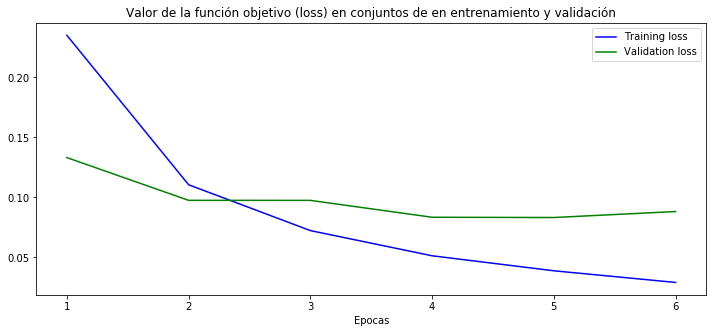

In [41]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)


plt.figure(figsize=(12,5))
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Valor de la función objetivo (loss) en conjuntos de en entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('')
plt.legend()

plt.show()


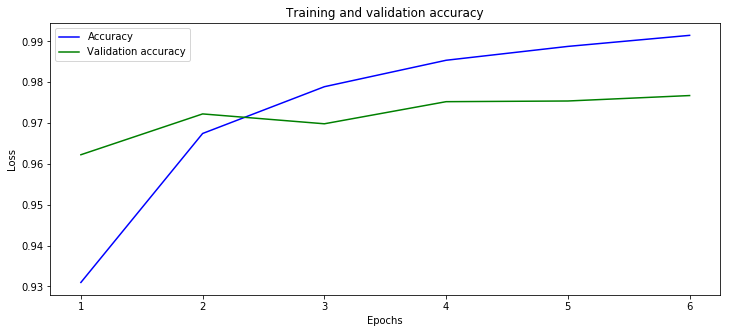

In [42]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']


plt.figure(figsize=(12,5))
plt.plot(epochs, acc_values, 'b', label='Accuracy')
plt.plot(epochs, val_acc_values, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
#visualización del desempeño
y_pred = nn.predict(test_images).squeeze()

score = nn.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07837942736849073
Test accuracy: 0.9774


In [44]:
import numpy as np
# Import the modules from sklearn.metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

y_test_label = np.argmax(test_labels,1) 
y_pred_label = np.argmax(y_pred,1)

# Confusion matrix
C=confusion_matrix(y_pred_label, y_test_label)
print(C)

[[ 972    0    1    1    2    2    3    1    4    4]
 [   0 1126    0    0    0    0    3    3    0    6]
 [   2    3 1015    4    5    0    1    9    4    1]
 [   3    1    5  999    0   21    1    3   12   22]
 [   0    0    1    0  966    1    2    1    4   15]
 [   0    0    0    0    0  857    3    0    4    2]
 [   1    2    2    0    3    7  943    0    2    0]
 [   1    0    5    4    2    0    0 1008    3   10]
 [   1    3    3    2    2    4    2    1  940    1]
 [   0    0    0    0    2    0    0    2    1  948]]


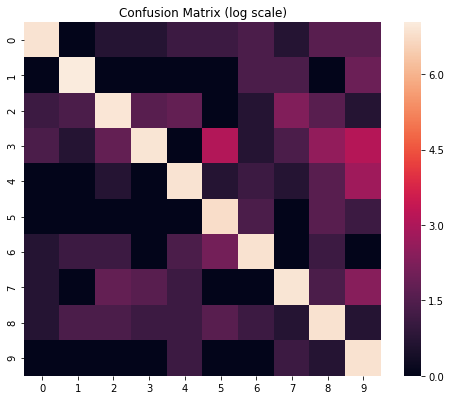

In [45]:
import seaborn as sns
# En escala logaritmica !
plt.figure(figsize=(8,6.5))
plt.title('Confusion Matrix (log scale)')
sns.heatmap(np.log(C+1), xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.show()

In [46]:
precision_score(y_pred_label, y_test_label, average='macro') #Fracción de datos correctos entre los datos detectados como “Positivos”.

0.9770535947341944

In [47]:
# Recall
recall_score(y_pred_label, y_test_label,  average='macro') #Fracción de los datos positivos que han sido detectados como positivos

0.9778161887474089

In [48]:
f1_score(y_pred_label, y_test_label,  average='macro') #Media armónica de la precisión y el recall. Penaliza el desbalance entre las métricas P y R

0.9772481326415449